Exercise Sheet 8 **K-means Clustering**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [30]:
# Load the data
data = np.loadtxt("cluster.dat")
t_max = 5
distance = np.linalg.norm
p = data.shape[1]
dim = data.shape[0]

**8.1: K-means Clustering – batch version**

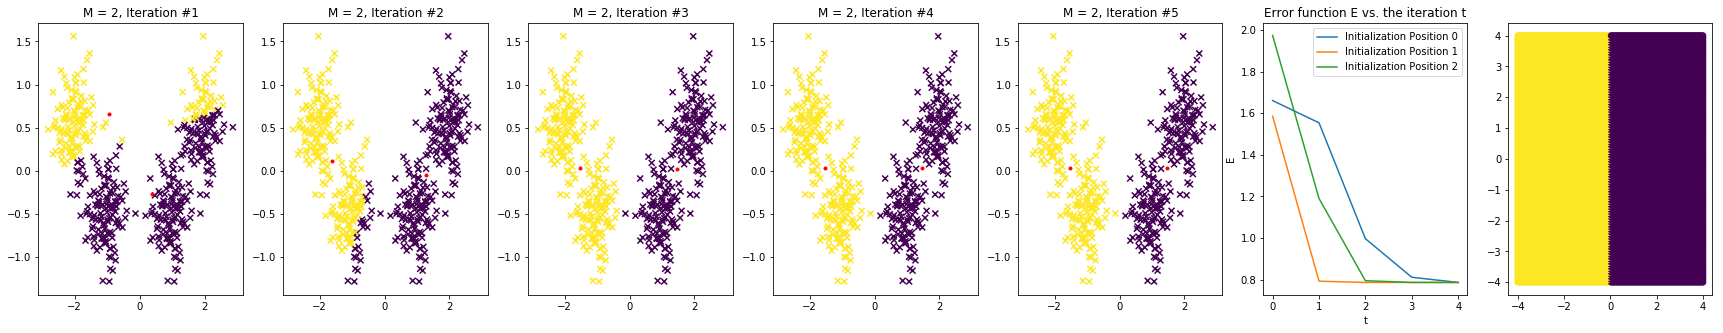

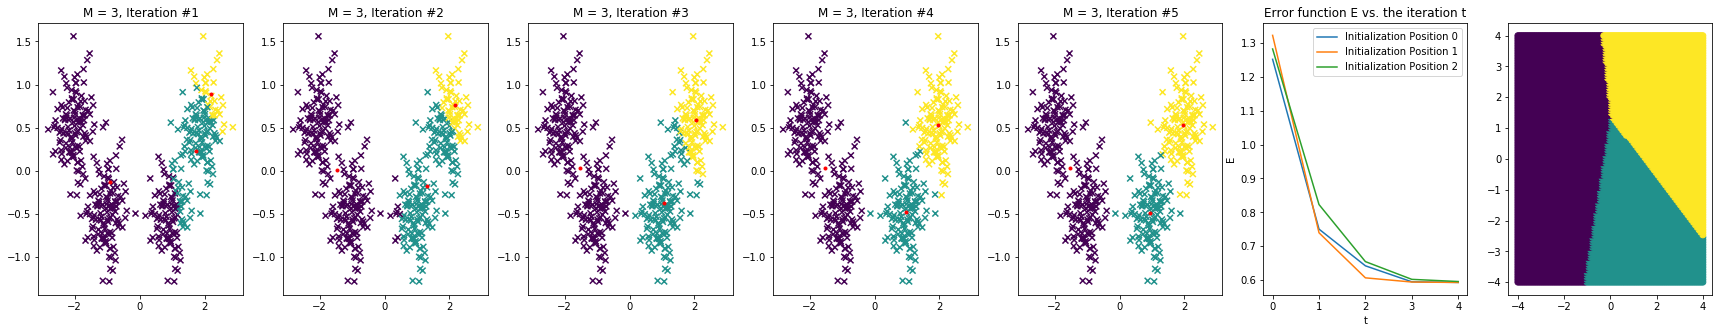

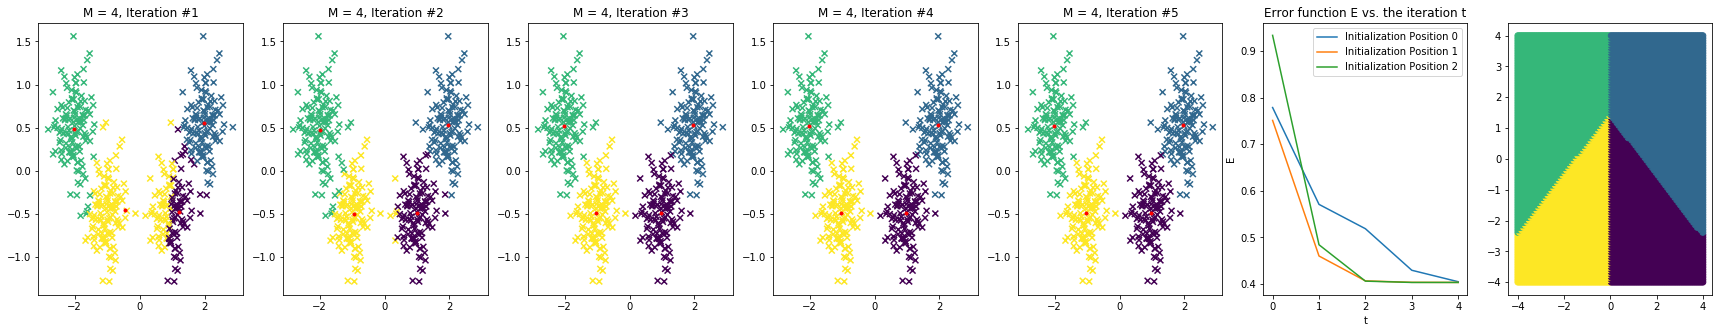

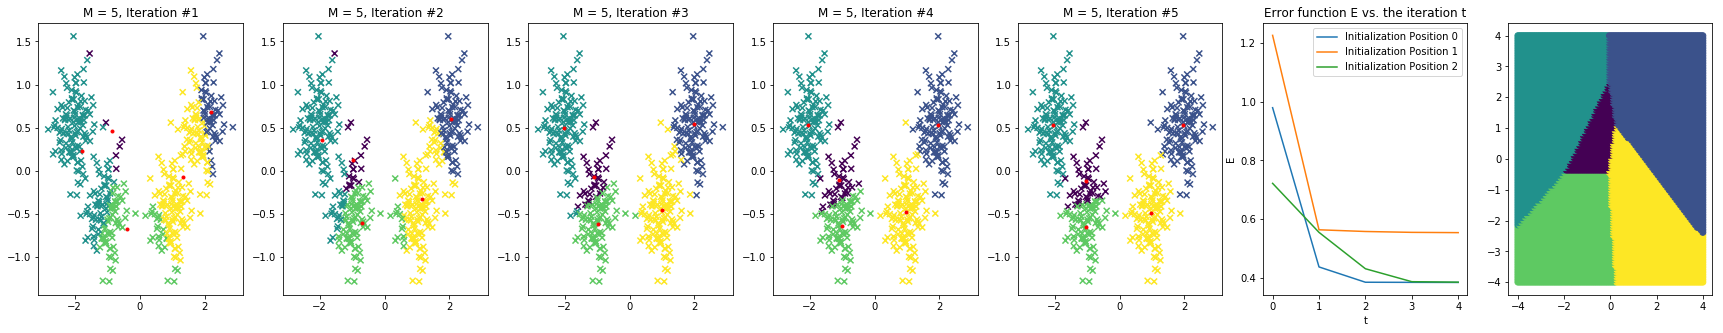

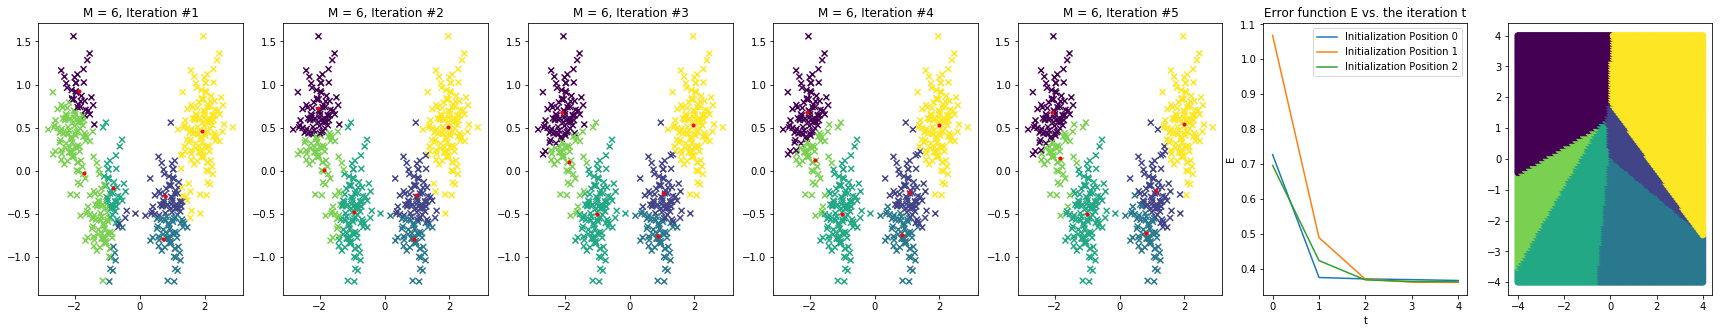

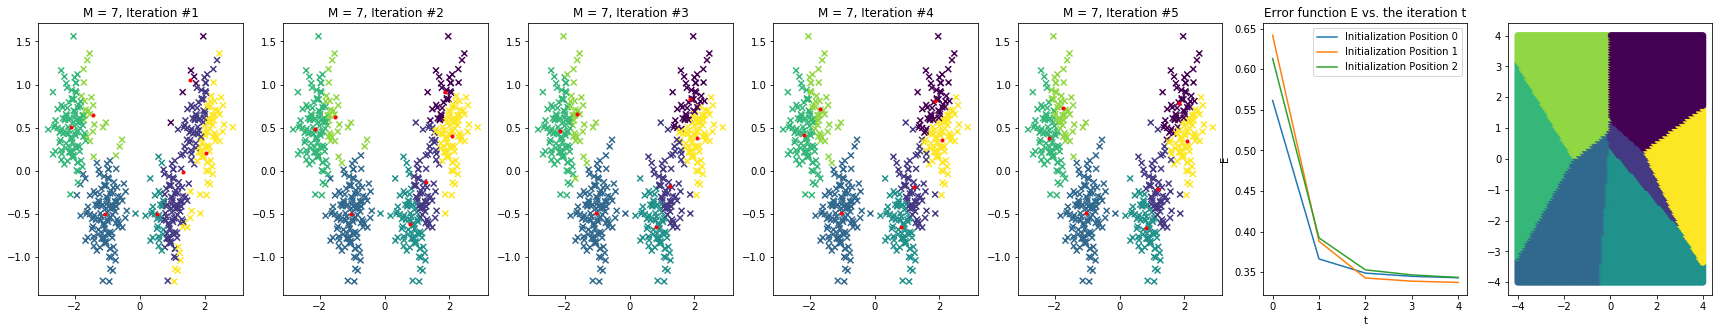

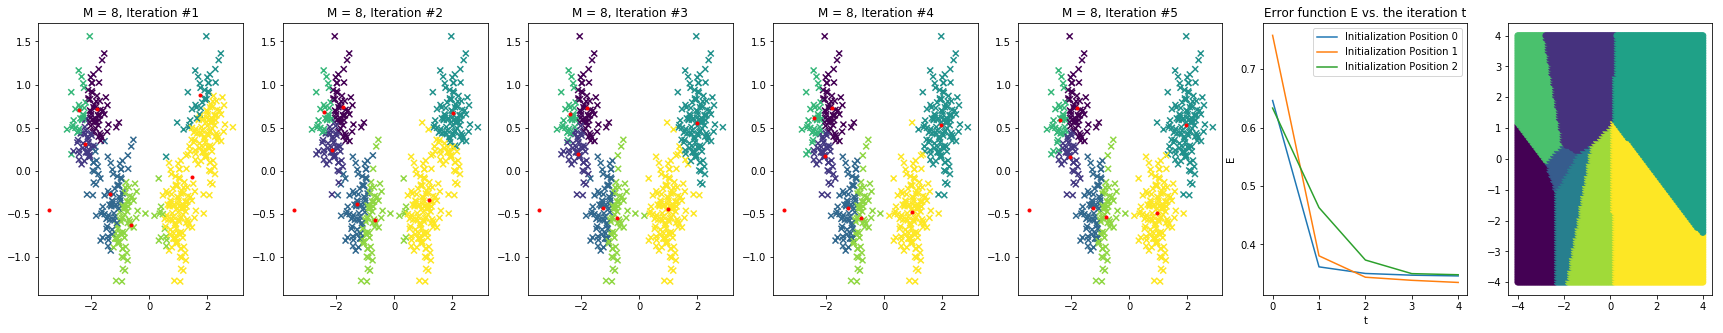

In [31]:
for clusters in range(2, 9):

    fig, ax = plt.subplots(1, 7, figsize=(30, 5))
    
    #different initializations of the prototypes 
    for positions in range(3):
        _plt = np.where(positions == 2, True, False)
            
        #Set prototypes wq randomly around the mean of the entire dateset
        centers = np.random.multivariate_normal(np.mean(data, axis=1), np.cov(data), clusters)

        #Optimization 
        errors = []
        for t in range(t_max):
            distances = distance(data.T[np.newaxis, :] - centers[:, np.newaxis], axis=2)
            indices   = np.argmin(distances, axis=0)
            
            #Re-compute the location of the prototypes due to the new assignments.
            for M in range(clusters):
                centers[M, :] = np.where(np.sum(M == indices) > 0,
                                         np.mean(data[:, indices == M], axis=1),
                                         centers[M, :])

            # Visualize data points and prototypes for each iteration in a sequence of scatter plots.
            if _plt:
                ax[t].set_title(f"M = {clusters}, Iteration #{t+1}")
                ax[t].scatter(data[0, :], data[1, :], c=indices, marker="x")
                ax[t].scatter(centers[:, 0], centers[:, 1], c="red", marker=".")
                
            
            errors.append(np.sum(distances[indices, range(len(indices))])/len(indices))
        
        # Plot the error function E vs. the iteration t
        ax[5].plot(errors, label=f"Initialization Position {positions}")
        ax[5].set_title("Error function E vs. the iteration t")
        ax[5].set_xlabel("t")
        ax[5].set_ylabel("E")
        ax[5].legend()
        
        # Voronoi-Tesselation
        if _plt:
            Voronoi_D = np.reshape(np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)), (2, -1))
            distances = distance(Voronoi_D.T[np.newaxis, :] - centers[:, np.newaxis], axis=2)
            indices = np.argmin(distances, axis=0)
            ax[6].scatter(Voronoi_D[0, :], Voronoi_D[1, :], c=indices)

**Exercise 8.2: Online K-means Clustering**

In [32]:
# 1. Set the initial position of prototypes wq randomly
#    around the mean of the entire dateset.
M = 4
mean_data = np.mean(data, axis=1)
init_prototypes = np.random.uniform(size=(M, dim)) + mean_data

# 2. Select an initial learning step epsilon
init_eps = 0.1

# 3. Set the maximum number of iterations tmax equal to the data set size p.
t_max = p

# Choose a suitable tau < 1 and implement online K-means clustering
#    using the following "annealing" schedule for epsilon:
tau = .99

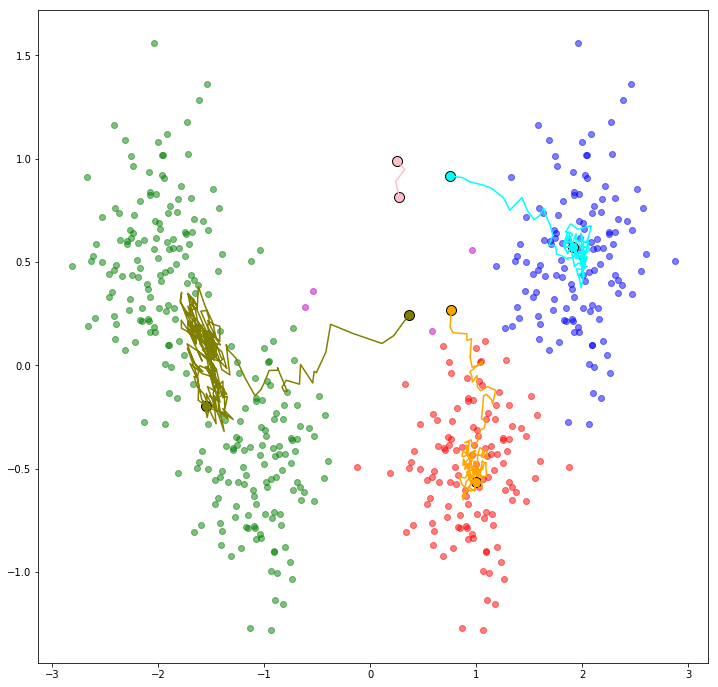

In [33]:
# the On-line K-means
prototypes = np.copy(init_prototypes)
prototypes_progress_array = np.zeros(shape=(p, M, dim))
eps = copy(init_eps)
for i in range(p):
    if i > t_max:
        eps = tau *eps
    x_a = data[:, i]
    distances = distance((x_a - prototypes), axis=1)
    i_q = np.argmin(distances)
    w_q = prototypes[i_q, :]
    dw_q = eps*(x_a - w_q)
    prototypes[i_q, :] = w_q + dw_q
    prototypes_progress_array[i] = prototypes
    
# finally assign the points to closest prototype
which_cluster = np.zeros(p)
for i in range(p):
    x_a = data[:, i]
    distances = distance((x_a - prototypes), axis=1)
    i_q = np.argmin(distances)
    which_cluster[i] = i_q
    
# colors
color_set = ['b', 'r', 'm', 'g']
color_lines = ['cyan', 'orange', 'pink', 'olive']
plt.figure(figsize=(12, 12))

# plotting data points
for i in range(p):
    i_c = np.int(which_cluster[i])
    plt.scatter(data[0, i],
                data[1, i],
                color=color_set[i_c], alpha=0.5)

# plotting starting prototypes
for j in range(M):
    plt.scatter(prototypes_progress_array[0, j, 0],
             prototypes_progress_array[0, j, 1],
             color=color_lines[j], marker='o', s = 100, edgecolors='k')

# plotting progress of prototypes
for j in range(M):
    plt.plot(prototypes_progress_array[:, j, 0],
             prototypes_progress_array[:, j, 1],
             color=color_lines[j])

# plotting final prototypes
for j in range(M):
    plt.scatter(prototypes_progress_array[-1, j, 0],
             prototypes_progress_array[-1, j, 1],
             color=color_lines[j], marker='o', s = 100, edgecolors='k')

plt.show()

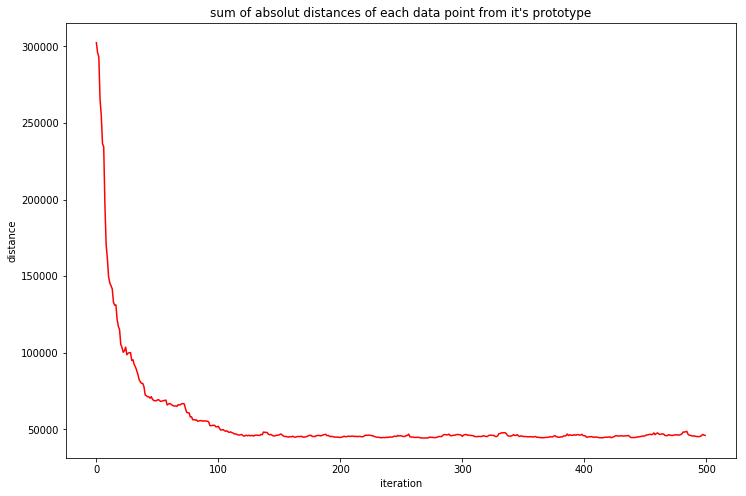

In [36]:
# (b) Plot the error function E (as above) against the iteration t. Is E nonincreasing?
# the On-line K-means
prototypes = np.copy(init_prototypes)
Error_progress_array = np.zeros(p)

for i in range(p):
    prototypes = prototypes_progress_array[i]
    error = 0
    for j in range(p):
        x_a = data[:, j]
        i_q = int(which_cluster[j])
        distances = distance((x_a - prototypes[i_q]))
        error += distances
    Error_progress_array[i] = (error**2)/2

# plotting the "Error"
plt.figure(figsize=(12, 8))
plt.title("sum of absolut distances of each data point from it's prototype")
plt.plot(Error_progress_array, color='r')
plt.xlabel('iteration')
plt.ylabel('distance')
plt.show()

E is not nonincreasing which might be due to change in the cluster (a prototype may change direction to another cluster) as it can be seen in the blue line.